# 1.Run

In [3]:
# Import necessary libraries
import pandas as pd
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/Churn_Modelling/Churn_Modelling.Neural_Network.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame
df.head()

Mounted at /content/drive


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 2.Information

In [4]:
# Section: Information
# Display information about the DataFrame (e.g., column types, non-null counts)

# The info() function provides detailed information about the DataFrame,
# including the number of non-null values, data types of each column, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# 3.Missing data

Missing values in each column:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 

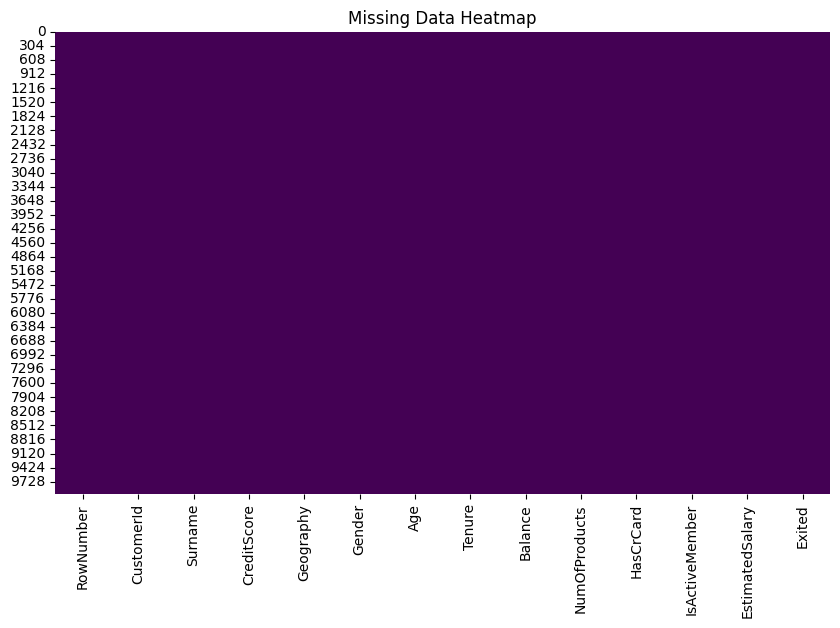

In [5]:
# Section: Missing Data

# Check for any missing values in each column and print the result
missing_values = df.isnull().sum()  # Calculate the number of missing values in each column
print("Missing values in each column:\n", missing_values)  # Display the missing values

# Display information about the DataFrame (e.g., column types, non-null counts)
df.info()

# Import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize missing data
plt.figure(figsize=(10, 6))  # Set the size of the figure
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")  # Create heatmap for missing values
plt.title('Missing Data Heatmap')  # Add title to the heatmap
plt.show()  # Show the plot

# 4.Outliers

In [6]:
# Section: Outliers - Data Type Check

import pandas as pd

# Check if all columns in the DataFrame are numerical
is_numerical = df.apply(lambda x: pd.api.types.is_numeric_dtype(x))  # Check the datatype of each column
print("Are all columns numerical?\n", is_numerical)  # Display boolean series indicating numerical columns

# Check if all columns are numerical
all_numerical = is_numerical.all()  # Verify if all columns are numerical
if all_numerical:
    print("All columns are numerical.")
else:
    print("There is an error, please check your database.")  # Warn if any column is not numerical
    non_numerical_columns = df.columns[~is_numerical]  # Identify non-numerical columns
    print("Non-numerical columns:\n", non_numerical_columns)  # Display the non-numerical columns


Are all columns numerical?
 RowNumber           True
CustomerId          True
Surname            False
CreditScore         True
Geography          False
Gender             False
Age                 True
Tenure              True
Balance             True
NumOfProducts       True
HasCrCard           True
IsActiveMember      True
EstimatedSalary     True
Exited              True
dtype: bool
There is an error, please check your database.
Non-numerical columns:
 Index(['Surname', 'Geography', 'Gender'], dtype='object')


In [7]:
import pandas as pd

# Calculate the frequency distribution for the 'Geography' column
geography_counts = df['Geography'].value_counts()
print("Geography Frequency Distribution:")
print(geography_counts)

# Calculate the frequency distribution for the 'Gender' column
gender_counts = df['Gender'].value_counts()
print("Gender Frequency Distribution:")
print(gender_counts)

Geography Frequency Distribution:
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender Frequency Distribution:
Gender
Male      5457
Female    4543
Name: count, dtype: int64


Statistics by Gender:
    Gender  Exit Rate  Count
0  Female   0.250715   4543
1    Male   0.164559   5457

Statistics by Geography:
   Geography  Exit Rate  Count
0    France   0.161548   5014
1   Germany   0.324432   2509
2     Spain   0.166734   2477


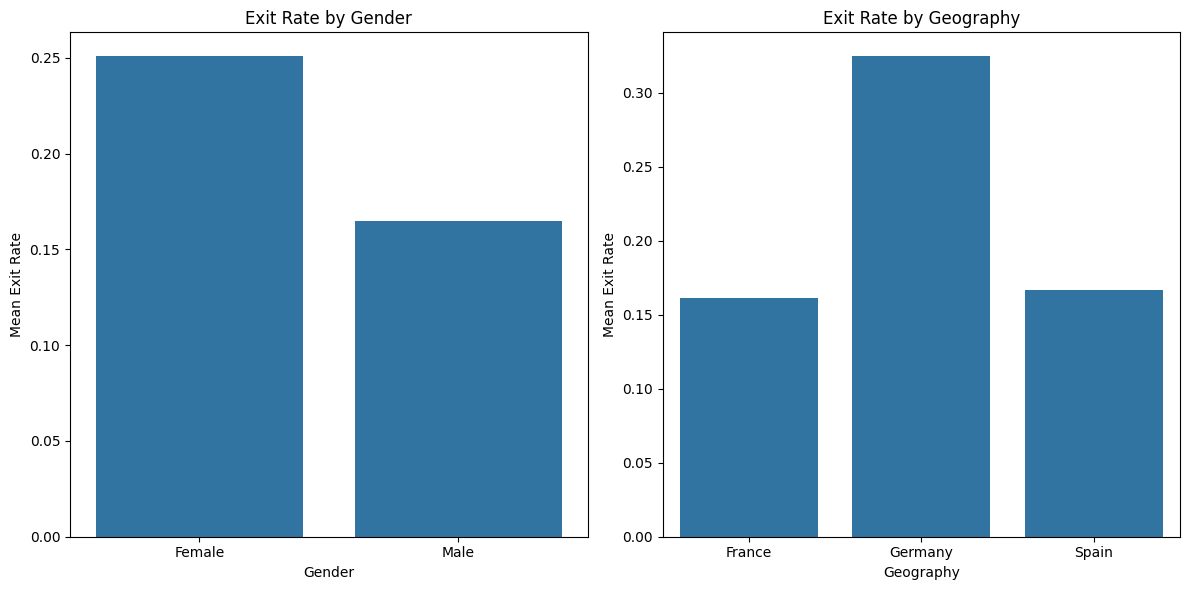

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Calculate descriptive statistics for Gender
gender_stats = df.groupby('Gender')['Exited'].agg(['mean', 'count']).reset_index()
gender_stats.columns = ['Gender', 'Exit Rate', 'Count']
print("Statistics by Gender:\n", gender_stats)

# 2. Calculate descriptive statistics for Geography
geo_stats = df.groupby('Geography')['Exited'].agg(['mean', 'count']).reset_index()
geo_stats.columns = ['Geography', 'Exit Rate', 'Count']
print("\nStatistics by Geography:\n", geo_stats)

# 3. Visual analysis by Gender
plt.figure(figsize=(12, 6))

# Bar plot for Gender
plt.subplot(1, 2, 1)
sns.barplot(x='Gender', y='Exit Rate', data=gender_stats)
plt.title('Exit Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Exit Rate')

# 4. Visual analysis by Geography
plt.subplot(1, 2, 2)
sns.barplot(x='Geography', y='Exit Rate', data=geo_stats)
plt.title('Exit Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Mean Exit Rate')

# Display the plots
plt.tight_layout()
plt.show()



Analysis for column: Geography
Number of unique values in Geography: 3
Distribution of values in Geography:
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Percentage distribution of values in Geography:
Geography
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64


<ipython-input-9-7d14b41f8801>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')  # Bar plot for distribution


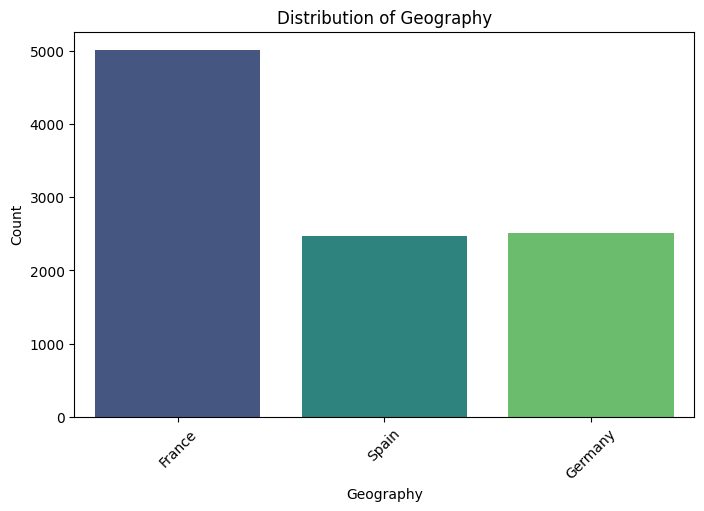


Analysis for column: Gender
Number of unique values in Gender: 2
Distribution of values in Gender:
Gender
Male      5457
Female    4543
Name: count, dtype: int64
Percentage distribution of values in Gender:
Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64


<ipython-input-9-7d14b41f8801>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')  # Bar plot for distribution


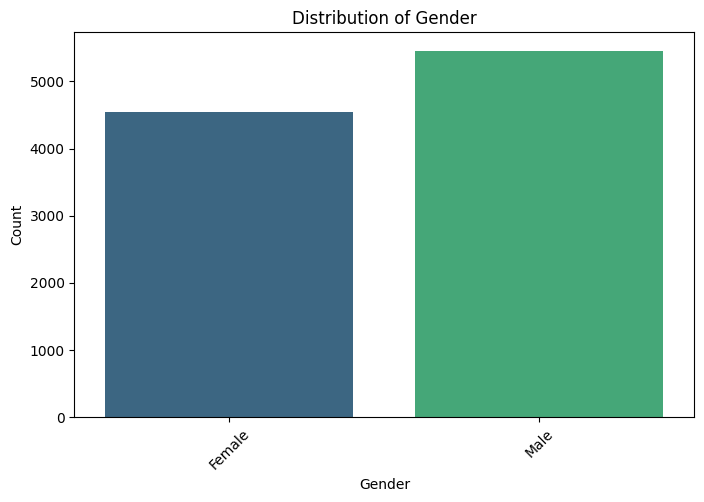

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Descriptive analysis for the remaining categorical columns
text_columns = ['Geography', 'Gender']  # Remaining categorical columns

for column in text_columns:
    print(f"\nAnalysis for column: {column}")

    # 1. Calculate the number of unique values
    unique_values = df[column].nunique()
    print(f'Number of unique values in {column}: {unique_values}')

    # 2. Calculate the value distribution
    value_distribution = df[column].value_counts()
    print(f'Distribution of values in {column}:\n{value_distribution}')

    # 3. Display the percentage distribution
    value_percentage = df[column].value_counts(normalize=True) * 100
    print(f'Percentage distribution of values in {column}:\n{value_percentage}')

    # 4. Visualize the data distribution
    plt.figure(figsize=(8, 5))  # Set the size of the figure
    sns.countplot(data=df, x=column, palette='viridis')  # Bar plot for distribution
    plt.title(f'Distribution of {column}')  # Title of the plot
    plt.xlabel(column)  # Label for x-axis
    plt.ylabel('Count')  # Label for y-axis
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()  # Display the plot


# # Feature Elimination

In [10]:
import pandas as pd  # pandas library for data manipulation

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling/Churn_Modelling.csv')

# Remove the 'surname' column from the DataFrame
# 'inplace=True' ensures the change is applied directly to the original DataFrame
df.drop(columns=['Surname'], inplace=True)

# Save the updated DataFrame to a new CSV file
# 'index=False' ensures row indices are not included in the saved CSV file
df.to_csv('data_updated.csv', index=False)

print(df.columns)

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')


In [11]:
import pandas as pd

# Select numerical columns from the DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize a dictionary to store the indices of outliers for each column
outliers = {}

# Loop through each numerical column to detect outliers
for col in numeric_columns:
    # Calculate the first and third quartiles (Q1 and Q3)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1  # Calculate the Interquartile Range (IQR)

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the indices of outliers in the column
    outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    outliers[col] = outlier_indices.tolist()  # Store the outlier indices in the dictionary

# Print the number of outliers detected for each numerical column
for column, indices in outliers.items():
    print(f"{column}: {len(indices)} outliers")


RowNumber: 0 outliers
CustomerId: 0 outliers
CreditScore: 15 outliers
Age: 359 outliers
Tenure: 0 outliers
Balance: 0 outliers
NumOfProducts: 60 outliers
HasCrCard: 0 outliers
IsActiveMember: 0 outliers
EstimatedSalary: 0 outliers
Exited: 2037 outliers


In [12]:
# Section: Evaluation of Outliers - Numerical Data

import pandas as pd

# Select numerical columns from the DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the mean and standard deviation for all numerical columns
mean_values = df[numeric_columns].mean()  # Calculate mean
std_values = df[numeric_columns].std()  # Calculate standard deviation

# Create a summary table for the mean and standard deviation of all numerical metrics
summary_table = pd.DataFrame({
    'Metric': ['Mean', 'Standard Deviation'],  # Define the metrics
    **{col: [mean_values[col], std_values[col]] for col in numeric_columns}  # Include all numeric metrics dynamically
})

# Print the summary table
print(summary_table)


               Metric   RowNumber    CustomerId  CreditScore        Age  \
0                Mean  5000.50000  1.569094e+07   650.528800  38.921800   
1  Standard Deviation  2886.89568  7.193619e+04    96.653299  10.487806   

     Tenure       Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0  5.012800  76485.889288       1.530200    0.70550        0.515100   
1  2.892174  62397.405202       0.581654    0.45584        0.499797   

   EstimatedSalary    Exited  
0    100090.239881  0.203700  
1     57510.492818  0.402769  


In [13]:
import pandas as pd
import numpy as np
from scipy import stats

def remove_outliers(df):
    """
    Remove outliers from the DataFrame using the Z-score method.

    Parameters:
    df (DataFrame): Input pandas DataFrame containing numeric columns.

    Returns:
    DataFrame: A new DataFrame with outliers removed.
    """
    # Select numeric columns from the DataFrame
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

    # Check if there are any numeric columns to process
    if len(numeric_columns) > 0:
        # Calculate the Z-scores for the numeric columns
        z_scores = np.abs(stats.zscore(df[numeric_columns]))

        # Define a threshold for Z-scores to identify outliers
        threshold = 3
        outliers = (z_scores > threshold)

        # Identify rows that contain outliers
        rows_with_outliers = np.any(outliers, axis=1)

        # Create a new DataFrame excluding the rows with outliers
        df_cleaned = df[~rows_with_outliers]

        # Output the number of rows removed
        print("Number of rows removed:", np.sum(rows_with_outliers))
        return df_cleaned  # Return the cleaned DataFrame
    else:
        # Notify the user if no numeric columns are found
        print("No numeric columns found, please check your data.")
        return df  # Return the original DataFrame if no numeric columns are found

# Clean the DataFrame by removing outliers
df_cleaned = remove_outliers(df)


Number of rows removed: 201


In [14]:
import pandas as pd
import numpy as np

def calculate_stats(df):
    """
    Calculate the mean and standard deviation of numeric columns in the DataFrame.

    Parameters:
    df (DataFrame): Input pandas DataFrame containing numeric columns.

    Returns:
    DataFrame: A DataFrame containing the mean and standard deviation values.
    """
    # Select numeric columns from the DataFrame
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

    # Check if there are any numeric columns to process
    if len(numeric_columns) > 0:
        # Calculate the mean and standard deviation for the numeric columns
        mean_values = df[numeric_columns].mean()
        std_values = df[numeric_columns].std()

        # Prepare a dictionary to store mean and standard deviation
        stats_data = {
            'Mean': mean_values,
            'Standard Deviation': std_values
        }

        # Create a DataFrame from the statistics data
        stats_table = pd.DataFrame(stats_data)
        return stats_table  # Return the statistics DataFrame
    else:
        # Notify the user if no numeric columns are found
        print("No numeric columns found, please check your data.")
        return pd.DataFrame()  # Return an empty DataFrame if no numeric columns are found

# Calculate mean and standard deviation for the original and cleaned DataFrames
mean_std_original = calculate_stats(df)
mean_std_cleaned = calculate_stats(df_cleaned)

# Print the results of the calculations
print("\nMean and Standard Deviation of Original Data:")
print(mean_std_original)

print("\nMean and Standard Deviation of Cleaned Data:")
print(mean_std_cleaned)



Mean and Standard Deviation of Original Data:
                         Mean  Standard Deviation
RowNumber        5.000500e+03         2886.895680
CustomerId       1.569094e+07        71936.186123
CreditScore      6.505288e+02           96.653299
Age              3.892180e+01           10.487806
Tenure           5.012800e+00            2.892174
Balance          7.648589e+04        62397.405202
NumOfProducts    1.530200e+00            0.581654
HasCrCard        7.055000e-01            0.455840
IsActiveMember   5.151000e-01            0.499797
EstimatedSalary  1.000902e+05        57510.492818
Exited           2.037000e-01            0.402769

Mean and Standard Deviation of Cleaned Data:
                         Mean  Standard Deviation
RowNumber        4.996748e+03         2888.681023
CustomerId       1.569096e+07        71917.852506
CreditScore      6.505867e+02           96.341265
Age              3.838443e+01            9.663426
Tenure           5.011532e+00            2.890915
Balance

In [15]:
import pandas as pd
import numpy as np
from scipy import stats

def remove_outliers(df):
    """
    Remove outliers from the DataFrame using the Z-score method.

    Parameters:
    df (DataFrame): Input pandas DataFrame containing numeric columns.

    Returns:
    DataFrame: A new DataFrame with outliers removed.
    """
    # Select numeric columns from the DataFrame
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

    # Check if there are any numeric columns to process
    if len(numeric_columns) > 0:
        # Calculate the Z-scores for the numeric columns
        z_scores = np.abs(stats.zscore(df[numeric_columns]))

        # Define a threshold for Z-scores to identify outliers
        threshold = 3
        outliers = (z_scores > threshold)

        # Identify rows that contain outliers
        rows_with_outliers = np.any(outliers, axis=1)

        # Create a new DataFrame excluding the rows with outliers
        df_cleaned = df[~rows_with_outliers]

        # Output the number of rows removed
        print("Number of rows removed:", np.sum(rows_with_outliers))
        return df_cleaned  # Return the cleaned DataFrame
    else:
        # Notify the user if no numeric columns are found
        print("No numeric columns found, please check your data.")
        return df  # Return the original DataFrame if no numeric columns are found

# Load the original DataFrame from a CSV file (uncomment the next line if needed)
# df = pd.read_csv('your_data.csv')  # Load data from a CSV file

# Clean the DataFrame by removing outliers
df_cleaned = remove_outliers(df)

# Save the cleaned DataFrame to a CSV file
df_cleaned.to_csv('cleaned_data.csv', index=False)

# Notify that the cleaned data has been saved
print("Cleaned data has been saved to 'cleaned_data.csv'.")


Number of rows removed: 201
Cleaned data has been saved to 'cleaned_data.csv'.


In [16]:
import pandas as pd

def identify_categorical_unique_values(df):
    """
    Identify and extract unique values from categorical columns in the provided DataFrame.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing categorical data.

    Returns:
    pandas.DataFrame: A DataFrame containing the unique values for each categorical column.
    """

    # Select categorical columns from the DataFrame
    categorical_cols = df.select_dtypes(include=['object']).columns

    # Initialize a list to store unique values for each categorical column
    unique_values = []

    # Loop through each categorical column to extract unique values
    for col in categorical_cols:
        unique_vals = df[col].unique()  # Get unique values for the column
        unique_values.append({
            'Column': col,  # Column name
            'Unique Values': unique_vals  # List of unique values
        })

    # Create a new DataFrame from the unique values list
    unique_values_df = pd.DataFrame(unique_values)

    # Set display option to show full content of the DataFrame
    pd.set_option('display.max_colwidth', None)

    return unique_values_df  # Return the DataFrame containing unique values

unique_values_df = identify_categorical_unique_values(df)  # Call the function and get the result
print(unique_values_df)  # Print the DataFrame containing unique values


      Column             Unique Values
0  Geography  [France, Spain, Germany]
1     Gender            [Female, Male]


Frequency of values in column 'Geography':
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Frequency of values in column 'Gender':
Gender
Male      5457
Female    4543
Name: count, dtype: int64


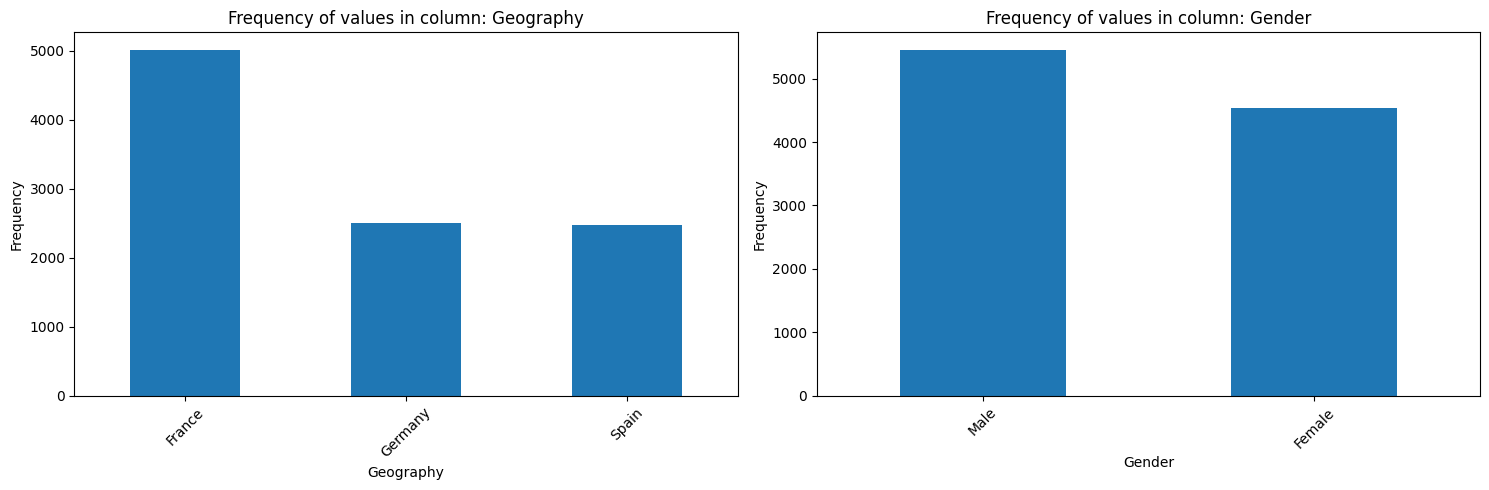

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_categorical_value_counts(df):
    """
    Calculate and plot the frequency of unique values for each categorical column in the provided DataFrame.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing categorical data.
    """

    # Select categorical columns from the DataFrame
    categorical_cols = df.select_dtypes(include=['object']).columns

    # Define the number of subplots based on the number of categorical columns
    num_cols = len(categorical_cols)
    num_rows = (num_cols + 1) // 2  # Two plots per row

    # Create subplots
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))  # Adjust the figure size as needed
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    # Loop through each categorical column to calculate and display value counts
    for i, col in enumerate(categorical_cols):
        print(f"Frequency of values in column '{col}':")

        # Calculate value counts for the current categorical column
        value_counts = df[col].value_counts()
        print(value_counts)  # Print the frequency of each unique value

        # Plotting the value counts as a bar chart
        value_counts.plot(kind='bar', ax=axes[i], title=f'Frequency of values in column: {col}')
        axes[i].set_xlabel(col)  # Label for x-axis
        axes[i].set_ylabel('Frequency')  # Label for y-axis
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-tick labels for better visibility

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plots

plot_categorical_value_counts(df)  # Call the function to display value counts and plots


In [18]:

import pandas as pd
import numpy as np

def identify_missing_and_unknown_values(df, unknown_symbol='?'):
    """
    Identify missing (NaN) values and values with a specific symbol (e.g., '?') in categorical columns.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing categorical data.
    unknown_symbol (str): The symbol used to represent unknown values. Default is '?'.

    Returns:
    None: Prints the columns with missing values and unknown symbol occurrences.
    """

    # Select categorical columns from the DataFrame
    categorical_cols = df.select_dtypes(include=['object']).columns

    # Check for missing (NaN) values in categorical columns
    missing_info = df[categorical_cols].isnull().sum()

    # Filter out columns with no missing values
    missing_cols = missing_info[missing_info > 0]

    # Display the columns with missing (NaN) values, if any
    if not missing_cols.empty:
        print("Columns with missing (NaN) values:")
        print(missing_cols)
    else:
        print("No missing (NaN) values found in categorical columns.")

    # Check for unknown values (e.g., '?') in categorical columns
    unknown_values = df[categorical_cols].apply(lambda col: (col == unknown_symbol).sum())

    # Filter out columns with no unknown values
    unknown_cols = unknown_values[unknown_values > 0]

    # Display the columns with unknown values, if any
    if not unknown_cols.empty:
        print(f"\nColumns with unknown values ('{unknown_symbol}'):")
        print(unknown_cols)
    else:
        print(f"\nNo unknown values ('{unknown_symbol}') found in categorical columns.")

# Example usage
# Assuming 'df' is your DataFrame and '?' is used to represent unknown values
identify_missing_and_unknown_values(df)


No missing (NaN) values found in categorical columns.

No unknown values ('?') found in categorical columns.


In [19]:
import pandas as pd

# Load the cleaned dataset (assuming df_cleaned is already available)
# If df_cleaned is not available, uncomment the following line to load it from a CSV file
# df_cleaned = pd.read_csv('cleaned_data.csv')  # Load data from CSV file

# Identify categorical columns for One-Hot Encoding
# Selecting columns of type 'object' which are categorical variables
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()

# Perform One-Hot Encoding on categorical columns
# This will convert categorical columns into dummy/indicator variables
# The drop_first=True parameter avoids the dummy variable trap by dropping the first category
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

# Display the final dataset after One-Hot Encoding
print("\nFinal dataset after One-Hot Encoding:")
print(df_encoded)

# Show a concise summary of the DataFrame, including column types and memory usage
# This will help to understand the structure of the encoded DataFrame
df_encoded.info()



Final dataset after One-Hot Encoding:
      RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  \
0             1    15634602          619   42       2       0.00   
1             2    15647311          608   41       1   83807.86   
2             3    15619304          502   42       8  159660.80   
3             4    15701354          699   39       1       0.00   
4             5    15737888          850   43       2  125510.82   
...         ...         ...          ...  ...     ...        ...   
9995       9996    15606229          771   39       5       0.00   
9996       9997    15569892          516   35      10   57369.61   
9997       9998    15584532          709   36       7       0.00   
9998       9999    15682355          772   42       3   75075.31   
9999      10000    15628319          792   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0                 1          1               1        101348.88      

# 5.Normalization

In [40]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# import seaborn as sns

# # Assuming df_standardized is the standardized dataset containing numeric columns for PCA
# # Assuming numeric_columns is a list of numeric columns to be used for PCA analysis

# # Step 1: Initialize PCA to reduce the data to 2 principal components
# pca = PCA(n_components=2)

# # Step 2: Apply PCA on the standardized data and reduce it to 2 components
# df_pca = pca.fit_transform(df_standardized[numeric_columns])

# # Step 3: Create a DataFrame to store the PCA results
# df_pca_result = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# # Step 4: Plot the PCA results using a scatter plot
# plt.figure(figsize=(8, 6))  # Set the figure size
# sns.scatterplot(x='PC1', y='PC2', data=df_pca_result, palette='viridis')  # Create the scatter plot
# plt.title('PCA: Dimensionality Reduction to 2 Components')  # Set the title of the plot
# plt.xlabel('Principal Component 1')  # Label for the x-axis
# plt.ylabel('Principal Component 2')  # Label for the y-axis
# plt.grid(True)  # Enable the grid
# plt.show()  # Display the plot

# # Step 5: Print the explained variance ratio to evaluate the amount of variance captured by each component
# print('Explained Variance Ratio:', pca.explained_variance_ratio_)


In [39]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# import seaborn as sns

# # Assuming df_standardized contains the standardized dataset with numeric columns for clustering
# # Assuming numeric_columns is a list of numeric columns used for K-Means clustering

# # Step 1: Define the number of clusters (K)
# num_clusters = 3  # You can adjust this value depending on your data

# # Step 2: Initialize and fit KMeans to the standardized data
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# kmeans.fit(df_standardized[numeric_columns])

# # Step 3: Add the cluster labels to the original standardized DataFrame
# df_standardized['Cluster'] = kmeans.labels_

# # Step 4: Visualize the clustered data using the PCA results
# plt.figure(figsize=(8, 6))  # Set the figure size
# sns.scatterplot(x='PC1', y='PC2', data=df_pca_result, hue=df_standardized['Cluster'], palette='viridis')  # Plot clusters
# plt.title('K-Means Clustering')  # Set the title
# plt.xlabel('Principal Component 1')  # Label for x-axis
# plt.ylabel('Principal Component 2')  # Label for y-axis
# plt.grid(True)  # Enable grid
# plt.show()  # Show the plot

# # --- Numerical output for analysis ---

# # Step 5: Print cluster centers (centroids)
# centroids = kmeans.cluster_centers_
# print("Cluster Centroids (Coordinates):")
# print(centroids)

# # Step 6: Print inertia (sum of squared distances to the nearest cluster center)
# print("Inertia (Sum of Squared Distances to Centroids):", kmeans.inertia_)

# # Step 7: Print the number of samples in each cluster
# cluster_counts = df_standardized['Cluster'].value_counts()
# print("Number of samples in each cluster:")
# print(cluster_counts)


In [37]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans

# # Assuming df_standardized contains the standardized dataset with numeric columns
# # Define the range of K (number of clusters)
# K_range = range(1, 12)  # You can adjust this range based on your data

# # List to store inertia values
# inertia_values = []

# # Loop over the range of K
# for k in K_range:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(df_standardized[numeric_columns])
#     inertia_values.append(kmeans.inertia_)  # Store inertia
#     print(f'K={k}, Inertia={kmeans.inertia_}')  # Print the inertia value for each K

# # Plotting the Elbow Curve
# plt.figure(figsize=(10, 6))
# plt.plot(K_range, inertia_values, marker='o')
# plt.title('Elbow Method for Optimal K')
# plt.xlabel('Number of Clusters (K)')
# plt.ylabel('Inertia')
# plt.grid(True)
# plt.xticks(K_range)  # Show ticks for all K values
# plt.show()


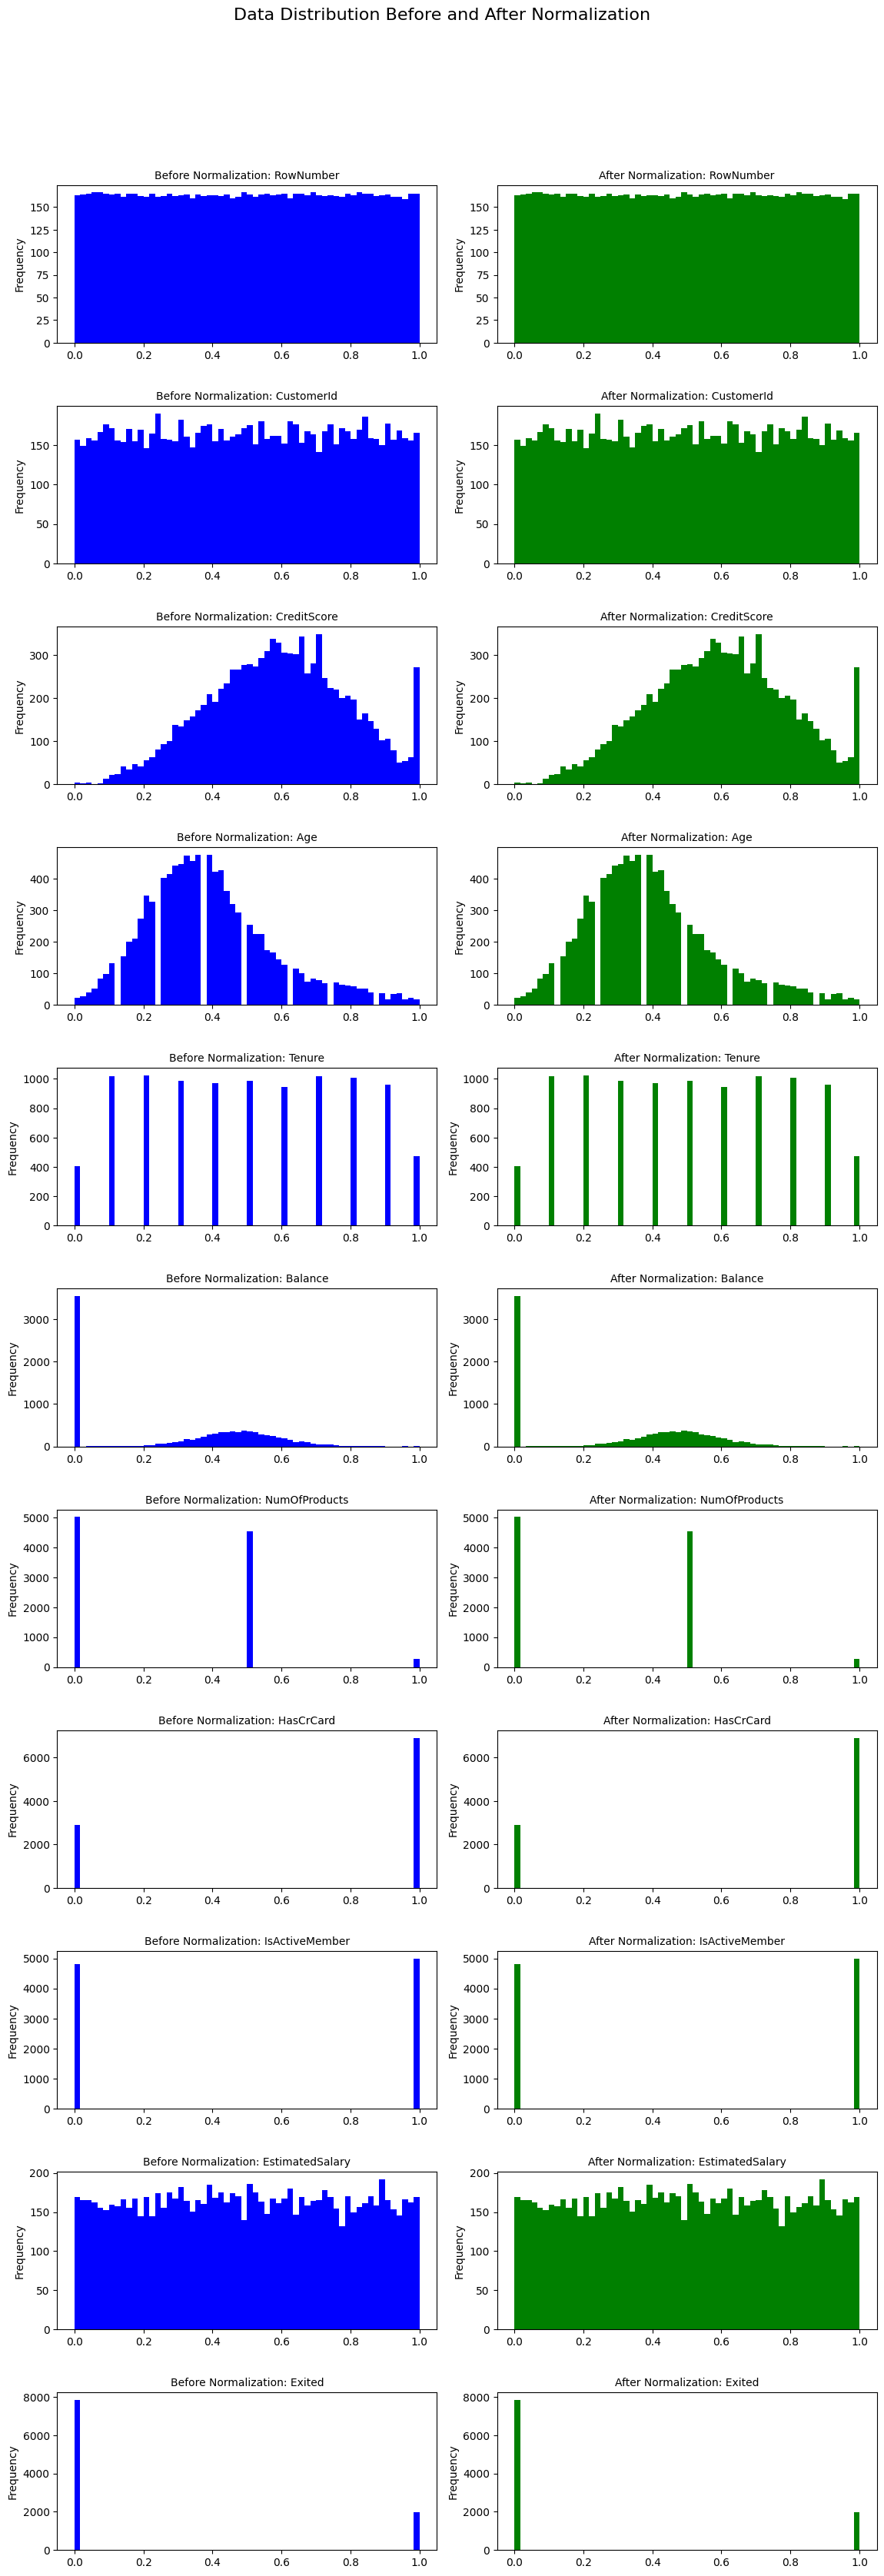

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Initialize the MinMaxScaler to scale features within a specified range (default: 0 to 1)
scaler = MinMaxScaler()

# Select numeric columns from the encoded DataFrame
numeric_columns = df_encoded.select_dtypes(include=[np.number]).columns

# Apply the MinMaxScaler to normalize only the numeric columns
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

# Display normalized DataFrame (Uncomment for checking output)
# print("\nNormalized DataFrame:")
# print(df_encoded)

# Count the number of numeric columns
num_columns = len(numeric_columns)

# Define the number of rows and columns for subplots (two columns: before and after normalization)
rows = num_columns
cols = 2  # Left for before normalization, right for after normalization

# Create a figure with subplots for comparing data distribution
fig, axs = plt.subplots(rows, cols, figsize=(12, 3 * num_columns))  # Dynamic figure size based on number of features
fig.suptitle('Data Distribution Before and After Normalization', fontsize=16, y=1.02)  # Set title and adjust position

# Loop over each numeric column to create the histograms
for i, column in enumerate(numeric_columns):
    # Plot histogram before normalization
    ax_before = axs[i, 0]  # Left column for before normalization
    df_encoded[column].plot(kind='hist', bins=60, color='blue', ax=ax_before)  # Original data histogram
    ax_before.set_title(f'Before Normalization: {column}', fontsize=10)  # Set subplot title

    # Plot histogram after normalization
    ax_after = axs[i, 1]  # Right column for after normalization
    df_encoded[column].plot(kind='hist', bins=60, color='green', ax=ax_after)  # Normalized data histogram
    ax_after.set_title(f'After Normalization: {column}', fontsize=10)  # Set subplot title

# Adjust layout to avoid text and plot overlapping
plt.tight_layout(pad=2.5, h_pad=2, w_pad=1)  # Padding between plots
plt.subplots_adjust(top=0.95, hspace=0.4)  # Adjust top and horizontal space between plots

# Display the plot
plt.show()






# 6.Training set 80% and validation 20% set

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assume df_encoded contains your data

# Split the DataFrame into features (X) and the target variable (y)
# X will include all columns except 'Exited', which is our target
X = df_encoded.drop('Exited', axis=1)  # Features (everything except 'Exited')
y = df_encoded['Exited']  # Target variable ('Exited')

# Split the data into training and testing sets (80% train, 20% test)
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the resulting datasets to verify the splits
print(f"Shape of training features (X_train): {X_train.shape}")  # Size of the training set (features)
print(f"Shape of testing features (X_test): {X_test.shape}")      # Size of the testing set (features)
print(f"Shape of training target (y_train): {y_train.shape}")     # Size of the training set (target)
print(f"Shape of testing target (y_test): {y_test.shape}")        # Size of the testing set (target)


Shape of training features (X_train): (7839, 13)
Shape of testing features (X_test): (1960, 13)
Shape of training target (y_train): (7839,)
Shape of testing target (y_test): (1960,)


In [58]:
print(df_encoded)

      RowNumber  CustomerId  CreditScore       Age  Tenure   Balance  \
0        0.0000    0.275616     0.525667  0.461538     0.2  0.000000   
1        0.0001    0.326454     0.503080  0.442308     0.1  0.334031   
2        0.0002    0.214421     0.285421  0.461538     0.8  0.636357   
3        0.0003    0.542636     0.689938  0.403846     0.1  0.000000   
4        0.0004    0.688778     1.000000  0.480769     0.2  0.500246   
...         ...         ...          ...       ...     ...       ...   
9995     0.9996    0.162119     0.837782  0.403846     0.5  0.000000   
9996     0.9997    0.016765     0.314168  0.326923     1.0  0.228657   
9997     0.9998    0.075327     0.710472  0.346154     0.7  0.000000   
9998     0.9999    0.466637     0.839836  0.461538     0.3  0.299226   
9999     1.0000    0.250483     0.880903  0.192308     0.4  0.518708   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0               0.0        1.0             1.0         0.506

# 7.Neural Network Architecture Design

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Number of input features (e.g., 13 columns in your dataset)
input_shape = 13

# Create a Sequential model, which allows stacking layers sequentially
model = Sequential()

# Add an input layer with the defined input shape
# The input shape specifies that the model expects input with 13 features
model.add(Input(shape=(input_shape,)))

# Add the first hidden layer with 64 neurons and ReLU activation function
# ReLU (Rectified Linear Unit) helps in handling non-linear relationships
model.add(Dense(64, activation='relu'))

# Add the second hidden layer with 128 neurons and ReLU activation
# Increasing the number of neurons helps the model capture more complex patterns
model.add(Dense(128, activation='relu'))

# Add the third hidden layer with 64 neurons and ReLU activation
# This is a symmetrical architecture, returning to 64 neurons like the first hidden layer
model.add(Dense(64, activation='relu'))

# Add the output layer with 1 neuron and a Sigmoid activation function
# Sigmoid is used for binary classification (outputting a value between 0 and 1)
model.add(Dense(1, activation='sigmoid'))

# Compile the model with an optimizer, loss function, and evaluation metrics
# - Optimizer: 'adam' is an adaptive learning rate optimization algorithm
# - Loss function: 'binary_crossentropy' is suitable for binary classification
# - Metrics: 'accuracy' to monitor model accuracy during training and evaluation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display a summary of the model, showing layer types, output shapes, and number of parameters
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,537 (68.50 KB)

 Trainable params: 17,537 (68.50 KB)

 Non-trainable params: 0 (0.00 B)

# 8.Training and Evaluation of Neural Network Model

In [62]:
# Train the model using the training data (X_train, y_train)
# - epochs=20: The model will iterate 20 times over the entire training dataset
# - batch_size=32: The training data will be divided into batches of 32 samples
# - validation_data: The model will evaluate performance on (X_test, y_test) after each epoch
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data (X_test, y_test)
# - The model will return the loss and accuracy metrics for the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy after evaluation
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7931 - loss: 0.4895 - val_accuracy: 0.8143 - val_loss: 0.4316
Epoch 2/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8349 - loss: 0.4023 - val_accuracy: 0.8224 - val_loss: 0.4093
Epoch 3/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8493 - loss: 0.3757 - val_accuracy: 0.8367 - val_loss: 0.3761
Epoch 4/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8496 - loss: 0.3592 - val_accuracy: 0.8403 - val_loss: 0.3717
Epoch 5/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8476 - loss: 0.3617 - val_accuracy: 0.8423 - val_loss: 0.3724
Epoch 6/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8572 - loss: 0.3507 - val_accuracy: 0.8531 - val_loss: 0.3561
Epoch 7/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8596 - loss: 0.3443 - val_accuracy: 0.8480 - val_loss: 0.3581
Epoch 8/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8517 - loss: 0.3459 - val_accuracy: 0.